**Install and import dependencies**


In [1]:
from obspy import read
import numpy as np
import matplotlib.pyplot as plt
import torch
from preprocessing import to3dArray

**Ensure CUDA is enabled for hardware accelerated training**

In [2]:
from warnings import warn
if not torch.cuda.is_available():
    warn("No hardware acceleration is being used. Install CUDA or ensure the runtime type is set to GPU if using google colab")
else:
    print("Torch with CUDA is enabled")

Torch with CUDA is enabled


**Replace SGY_PATH with the path to the SEGY file in the mounted google drive account**

In [3]:
SGY_PATH = "./SeismicData/Netherlands.sgy"

stream = read(SGY_PATH, format="SEGY")

for trace in stream:
    trace.normalize()
seismic_array = to3dArray(stream)

**Normalize all amplitude values from -1 to 1 for model interpretation**

**Calculate number of inlines and crosslines measured**

**Convert into Numpy array with axes as (depth, crossline, inline)**

Text(0, 0.5, 'Depth')

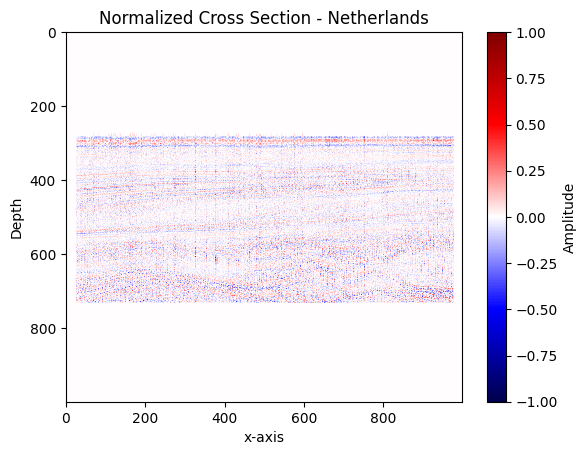

In [6]:
#Now that the seismic data is converted into a 3d array, we can plot the first crossline
from preprocessing import cropAndOrPad

first_crossline = seismic_array[0]
seismic_image = cropAndOrPad(first_crossline, (1000, 1000))

plt.imshow(seismic_image, cmap="seismic", aspect="auto")
plt.colorbar(label="Amplitude")
plt.title("Normalized Cross Section - Netherlands")
plt.xlabel("x-axis")
plt.ylabel("Depth")

In [ ]:
import torch.nn as nn


class FeatureExtractor(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d()
        